In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



In [94]:

#load first dataset 
import pandas as pd
first_diabetes_dataset = pd.read_csv("first_diabetes_dataset.csv")
print("Rows in second dataset:", len(first_diabetes_dataset))
first_diabetes_dataset['Diabetes'] = first_diabetes_dataset['Diabetes'].replace({1: 0, 2: 1})
first_diabetes_dataset.to_csv("first_diabetes_dataset.csv", index=False)
print(first_diabetes_dataset['Diabetes'].value_counts())


Rows in second dataset: 253680
Diabetes
0    253680
Name: count, dtype: int64


In [95]:
#load first dataset
first_diabetes_dataset = pd.read_csv("first_diabetes_dataset.csv")
second_diabetes_dataset = pd.read_csv("second_diabetes_dataset.csv")
third_diabetes_dataset = pd.read_csv("third_diabetes_dataset.csv")

print("\nColumns in second dataset:")
print(second_diabetes_dataset.columns.tolist())
print("\nColumns in third dataset:")
print(third_diabetes_dataset.columns.tolist())



columns_first = set(first_diabetes_dataset.columns)
columns_second = set(second_diabetes_dataset.columns)
columns_third = set(third_diabetes_dataset.columns)

if columns_first==columns_second == columns_third:

    diabetes_dataset = pd.concat(
        [first_diabetes_dataset, second_diabetes_dataset, third_diabetes_dataset],
        ignore_index=True
    )
    
   
    print("Total rows after combining:", len(diabetes_dataset))
    
else:
    print("Error: The columns in the datasets do not match and cannot be combined.")


diabetes_dataset.to_csv("diabetes_dataset.csv", index=False)


Columns in second dataset:
['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'DiffWalk', 'Sex', 'Age']

Columns in third dataset:
['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'DiffWalk', 'Sex', 'Age']
Total rows after combining: 578052


In [96]:
#Data cleaning
#Check for Missing Values
#Check for Duplicates
#Data Type Checking & Fixing
#Save Cleaned Dataset

In [97]:
#check the null value if founded replace with rounded mean value
diabetes_dataset = pd.read_csv("diabetes_dataset.csv")
print("Dataset shape:", diabetes_dataset.shape)
print("Column names:", diabetes_dataset.columns.tolist())
finding_missing_values = diabetes_dataset.isnull().sum()

if finding_missing_values.sum() > 0:
    print("Missing values found. Filling with rounded mean values...")
    
    for column in diabetes_dataset.select_dtypes(include='number').columns:
        if diabetes_dataset[column].isnull().sum() > 0:
            mean_val = diabetes_dataset[column].mean()
            rounded_mean = 1 if mean_val >= 0.5 else 0
            diabetes_dataset[column].fillna(rounded_mean, inplace=True)
            print(f"→ Column '{column}': Filled missing values with {rounded_mean} (mean was {mean_val:.3f})")
else:
    print("No missing values found.")


diabetes_dataset.to_csv("diabetes_dataset.csv", index=False)
print("Cleaned dataset saved successfully.")

Dataset shape: (578052, 14)
Column names: ['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'DiffWalk', 'Sex', 'Age']
No missing values found.
Cleaned dataset saved successfully.


In [98]:
#Grouping the BMI

bmi_bins = [0, 18.5, 25, 30, 35, 40, float('inf')]
bmi_labels = [
    'Underweight', 'Normal weight', 'Overweight',
    'Obese Class I', 'Obese Class II', 'Obese Class III'
]

# Apply the binning
diabetes_dataset['BMI'] = pd.cut(
    diabetes_dataset['BMI'],
    bins=bmi_bins,
    labels=bmi_labels,
    right=False, 
    include_lowest=True
)
diabetes_dataset.to_csv("diabetes_dataset.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


In [99]:
num_duplicates = diabetes_dataset.duplicated().sum()

print("Number of duplicate rows:", num_duplicates)
# diabetes_dataset = diabetes_dataset.drop_duplicates()
# diabetes_dataset.to_csv("diabetes_dataset.csv", index=False)
# print("Cleaned dataset saved successfully.")

Number of duplicate rows: 543459


In [100]:



# # Select numeric columns except 'BMI' and 'Age'
# numeric_columns = diabetes_dataset.select_dtypes(include=[np.number]).columns
# exclude_cols = ['BMI', 'Age']
# columns_for_outlier = [col for col in numeric_columns if col not in exclude_cols]


# # Outlier handling on columns except BMI and Age
# outliers_found = False

# for column in columns_for_outlier:
#     Q1 = diabetes_dataset[column].quantile(0.25)
#     Q3 = diabetes_dataset[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Identify outliers
#     outlier_mask = (diabetes_dataset[column] < lower_bound) | (diabetes_dataset[column] > upper_bound)
#     outliers = diabetes_dataset[column][outlier_mask]

#     if not outliers.empty:
#         outliers_found = True
#         print(f"\nOutliers found in column '{column}':")
#         print(outliers)

#         # Replace outliers with rounded mean
#         rounded_mean = round(diabetes_dataset[column].mean())
#         diabetes_dataset.loc[outlier_mask, column] = rounded_mean
#         print(f"→ Replaced with rounded mean: {rounded_mean}")

# if not outliers_found:
#     print("No outliers found in the dataset.")

# # Show boxplot after outlier handling (including BMI and Age)
# print("\nBoxplot after replacing outliers:")
# plt.figure(figsize=(15, 6))
# sns.boxplot(data=diabetes_dataset[numeric_columns], orient="h")
# plt.title("After Outlier Replacement")
# plt.show()

In [101]:
#data analysis
#Summary statistics
#Class Balance (Target Variable)
#Correlation Matrix
#Feature Distribution
# Cross-Analysis (Diabetes vs. Other Features)

            Diabetes         HighBP       HighChol      CholCheck  \
count  578052.000000  578052.000000  578052.000000  578052.000000   
mean        0.122293       0.445444       0.436544       0.964209   
std         0.327625       0.497015       0.495957       0.185769   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  578052.000000  578052.000000         578052.000000  578052.000000   
mean        0.447095       0.043212              0.100744       0.750000   
std         0.497194       0.203335              0.300989       0.433013   
min         0.000000       0.000000              0.000000       0.000000  

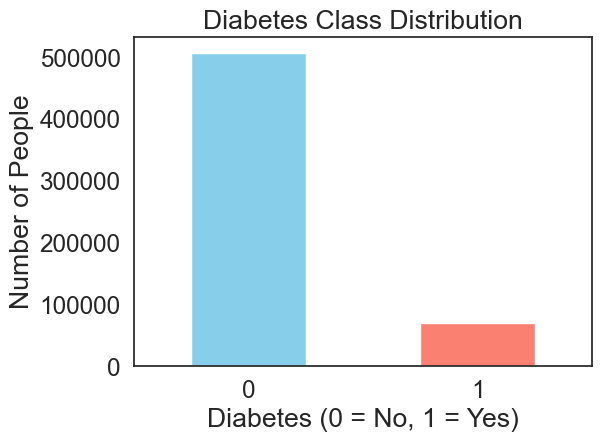

In [102]:
# Summary statistics
# Load the cleaned dataset
diabetes_dataset = pd.read_csv("diabetes_dataset.csv")
print(diabetes_dataset.describe())


# Print exact count of each class
print(diabetes_dataset['Diabetes'].value_counts())

# Plot exact counts (not proportions)
diabetes_dataset['Diabetes'].value_counts().plot(kind='bar', title='Diabetes Class Distribution', color=['skyblue', 'salmon'])
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Diabetes                 int64
HighBP                   int64
HighChol                 int64
CholCheck                int64
BMI                     object
Smoker                   int64
Stroke                   int64
HeartDiseaseorAttack     int64
PhysActivity             int64
Fruits                   int64
HvyAlcoholConsump        int64
DiffWalk                 int64
Sex                      int64
Age                      int64
dtype: object


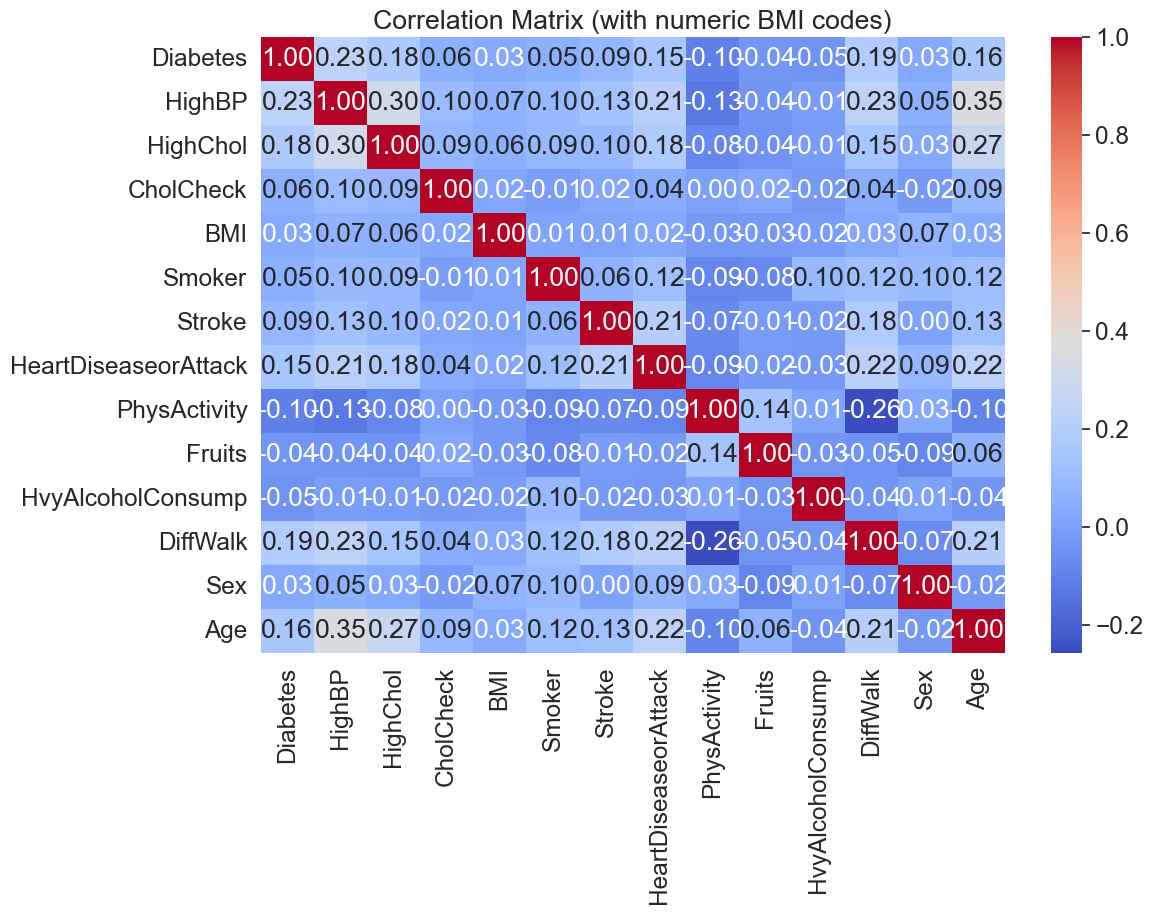

In [103]:
#Plot correlation heatmap
print(diabetes_dataset.dtypes)
 # Step 1: Convert 'BMI' column to category
diabetes_dataset['BMI'] = diabetes_dataset['BMI'].astype('category')

# Step 2: Replace it with corresponding numeric codes
diabetes_dataset['BMI'] = diabetes_dataset['BMI'].cat.codes
numeric_data = diabetes_dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (with numeric BMI codes)')
plt.show()

C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_1388\2870093395.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=diabetes_dataset, x='BMI', palette='pastel',


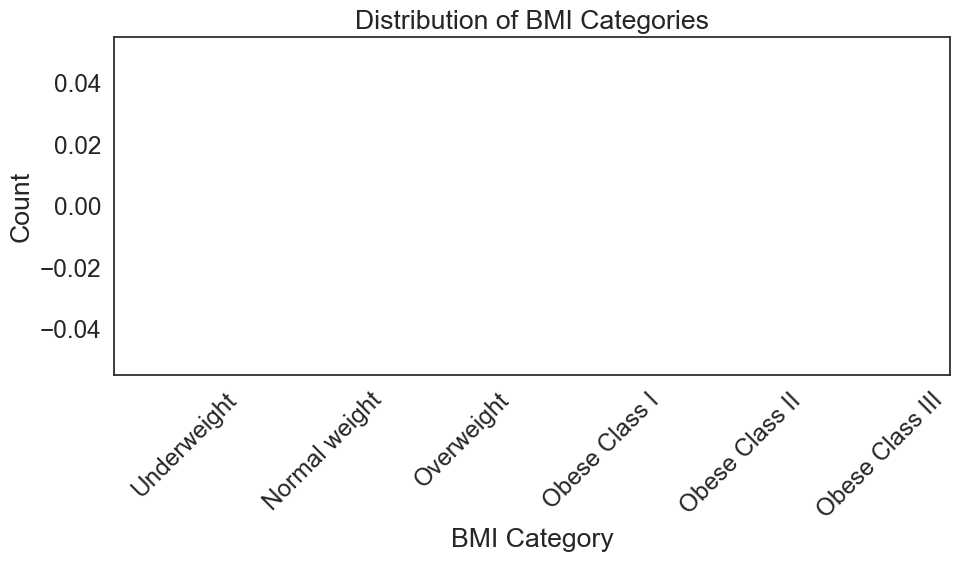

In [ ]:
#Distribution of BMI


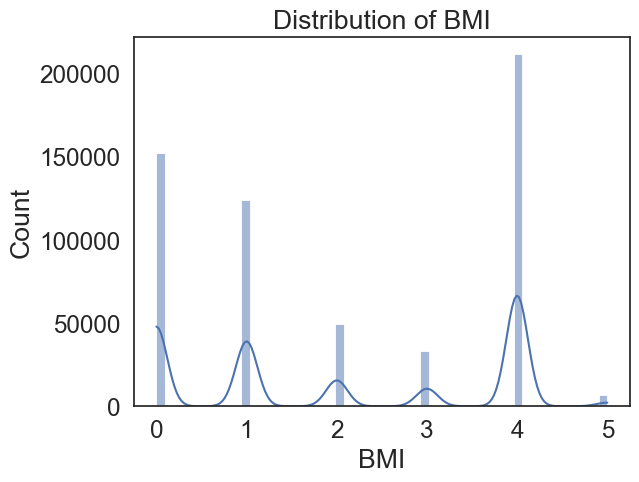

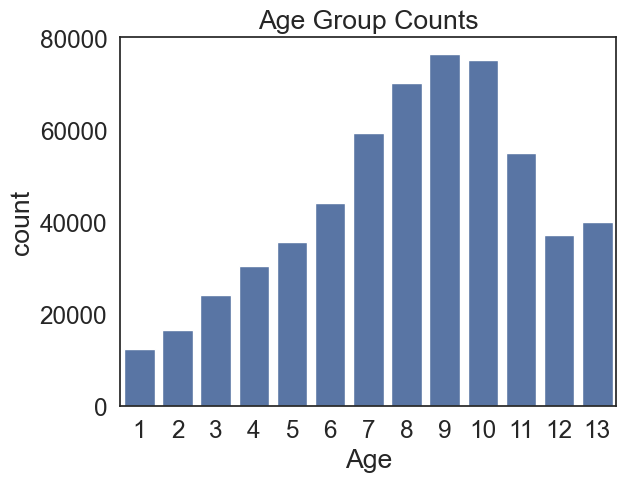

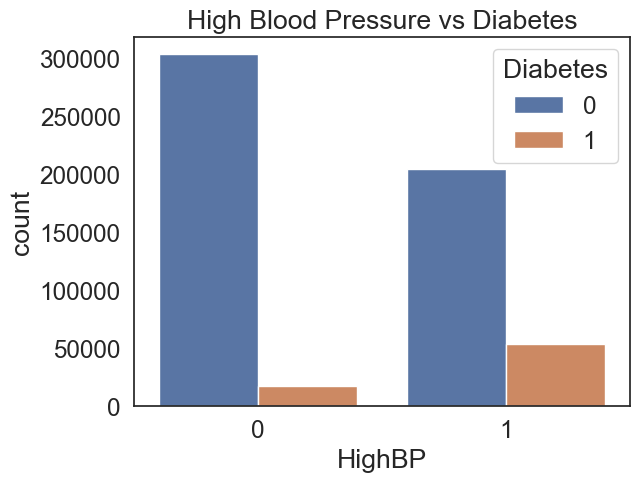

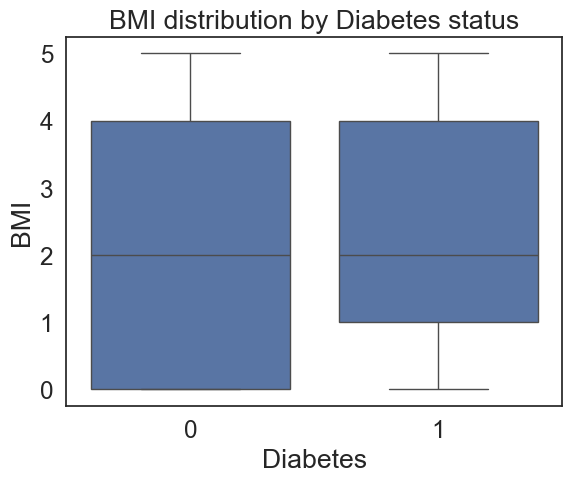

In [ ]:


# Example: Count plot for Age
sns.countplot(data=diabetes_dataset, x='Age')
plt.title('Age Group Counts')
plt.show()

#Cross-Analysis (Diabetes vs. Other Features)
# Diabetes vs HighBP
sns.countplot(x='HighBP', hue='Diabetes', data=diabetes_dataset)
plt.title('High Blood Pressure vs Diabetes')
plt.show()

# Diabetes vs BMI (Boxplot)
sns.boxplot(x='Diabetes', y='BMI', data=diabetes_dataset)
plt.title('BMI distribution by Diabetes status')
plt.show()

In [105]:
#model creation
#xgboost data model
#Random forest
#svm 


c:\Users\L E N O V O\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:19:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


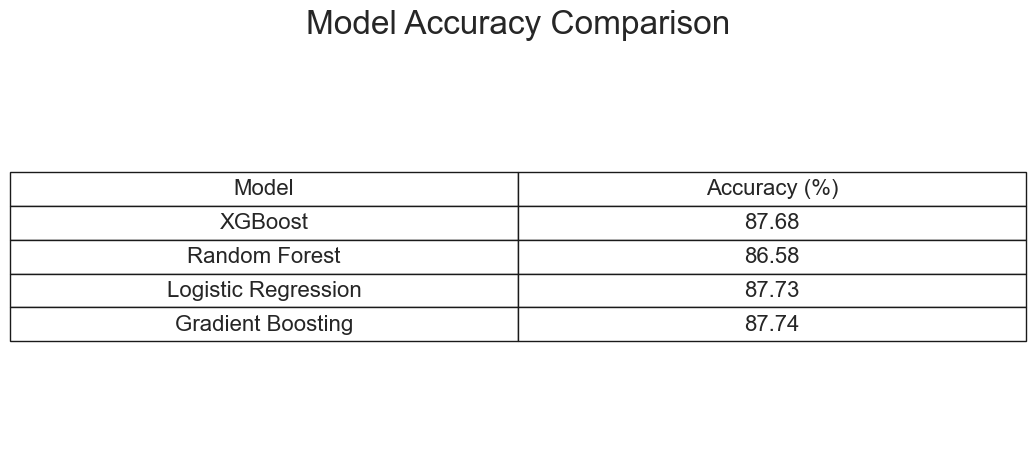

In [106]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


# Load and split data
X = diabetes_dataset.drop('Diabetes', axis=1)
y = diabetes_dataset['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.80, random_state=42
)

# Prepare list for results
results = []

def evaluate_model(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    results.append({
        'Model': name,
        'Accuracy (%)': round(accuracy * 100, 2)
    })

# Model 1: XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
evaluate_model("XGBoost", y_test, xgb_pred)

# Model 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
evaluate_model("Random Forest", y_test, rf_pred)

# Model 3: Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
evaluate_model("Logistic Regression", y_test, log_pred)

# Model 4: Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
evaluate_model("Gradient Boosting", y_test, gb_pred)

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Plot as a table
sns.set(style="white", font_scale=1.6)
plt.figure(figsize=(12, 5))
table_plot = plt.table(cellText=df_results.values,
                       colLabels=df_results.columns,
                       loc='center',
                       cellLoc='center',
                       colLoc='center')

table_plot.scale(1.5, 2.0)
table_plot.auto_set_font_size(False)
table_plot.set_fontsize(16)

plt.axis('off')
plt.title('Model Accuracy Comparison', fontsize=24, pad=20)
plt.tight_layout()
plt.savefig('model_accuracy_table.png', dpi=300)
plt.show()